In [1]:
#Kod dla wykresu z liczbą lotów dla poszczególnych modeli samolotów

In [2]:
import pandas as pd 
import numpy as np
from util.getData import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = getData(["TailNum"])
planes = getPlaneData()
planes = planes[["tailnum", "manufacturer", "model"]]

In [4]:
df1 = (df.merge(planes, left_on="TailNum", right_on="tailnum"))[["manufacturer", "model"]]
df1

,manufacturer,model
0,BOEING,737-522
1,BOEING,737-522
2,BOEING,737-522
3,BOEING,737-522
4,BOEING,737-522
...,...,...
43688021,BOEING,737-924ER
43688022,BOEING,737-824
43688023,BOEING,737-824
43688024,BOEING,737-824


In [5]:
df1["count"] = df1.groupby(["manufacturer", "model"])["manufacturer"].transform("count")

In [6]:
df1 = df1.drop_duplicates()
df1 = df1.sort_values("count", ascending=False).head(10)
df1

,manufacturer,model,count
26131471,BOMBARDIER INC,CL-600-2B19,2904399.0
11921190,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2433924.0
5272365,MCDONNELL DOUGLAS,DC-9-82(MD-82),2302612.0
19485518,EMBRAER,EMB-145LR,1860808.0
2381017,BOEING,757-232,1680624.0
8828909,AIRBUS INDUSTRIE,A320-232,1351409.0
71324,BOEING,737-322,1297521.0
1327748,BOEING,757-222,1280173.0
36616560,BOEING,737-3H4,1127082.0
32888044,BOEING,717-200,1067283.0


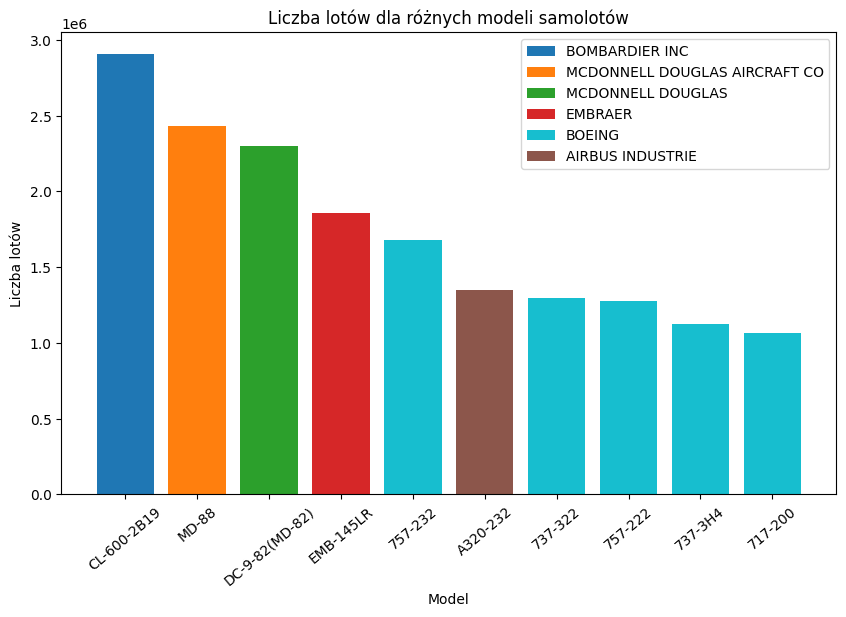

In [24]:
manufacturers_colors = {}
unique_manufacturers = list(df1.manufacturer)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for i, mod in enumerate(unique_manufacturers):
    manufacturers_colors[mod] = colors[i]

plt.figure(figsize=(10, 6))

# Rysowanie słupków
bars = []
for mod, man, count in zip(df1.model, df1.manufacturer, df1["count"]):
    bar = plt.bar(mod, count, color=manufacturers_colors[man])
    if man not in bars:
        bars.append(man)

# Tworzenie legendy
legend_handles = []
for bar in bars:
    legend_handles.append(plt.bar(0, 0, color=manufacturers_colors[bar]))

plt.xlabel('Model')
plt.ylabel('Liczba lotów')
plt.title('Liczba lotów dla różnych modeli samolotów')
plt.legend(legend_handles, unique_manufacturers)
plt.xticks(rotation=40)

plt.show()